In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings # Ignores any warning
warnings.filterwarnings("ignore")
train = pd.read_csv("Train.csv") 
test = pd.read_csv("Test.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### Moreover, from the 12 features, 5 are numeric and 7 categorical.

## 1. Exploratory Data Analysis (EDA)

In [3]:
#Check for duplicates
idsUnique = len(set(train.Item_Identifier))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 6964 duplicate IDs for 8523 total entries


### 1.1. Univariate Analysis

Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

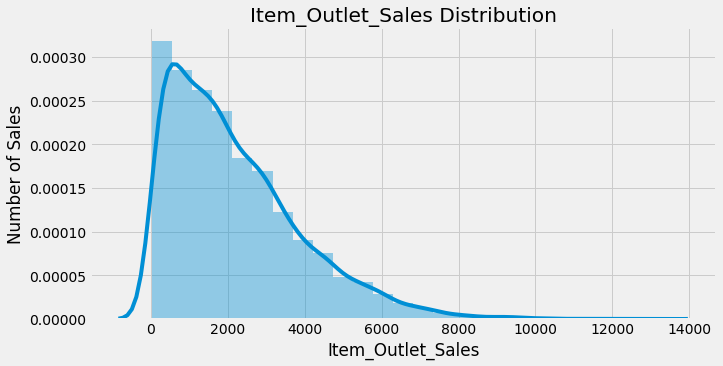

In [4]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))
sns.distplot(train.Item_Outlet_Sales, bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

In [5]:
print ("Skew is:", train.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % train.Item_Outlet_Sales.kurt())

Skew is: 1.1775306028542798
Kurtosis: 1.615877


### 1.1.2. Numerical Predictors

In [6]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [7]:
corr =numeric_features.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [8]:
print(corr['Item_Outlet_Sales'].sort_values(ascending=False))

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


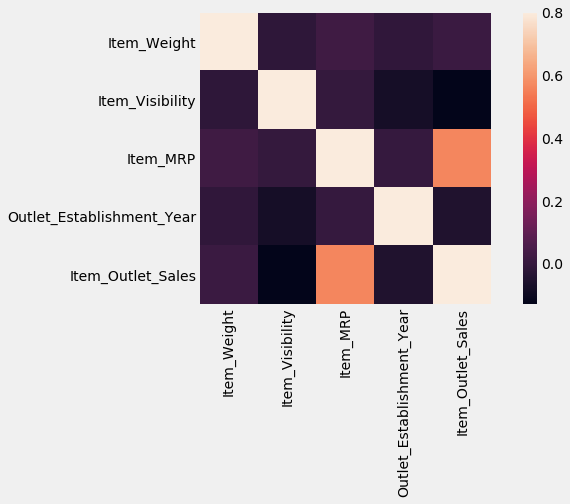

In [9]:
#correlation matrix
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(corr, vmax=.8, square=True);

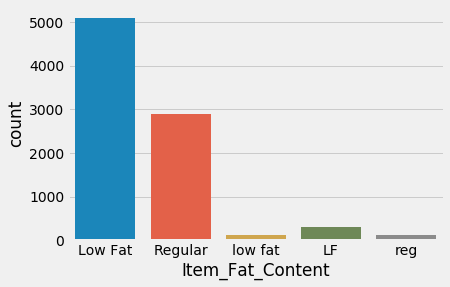

In [10]:
sns.countplot(train.Item_Fat_Content)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

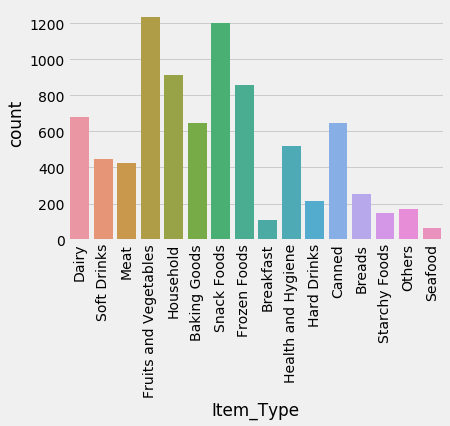

In [11]:
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)

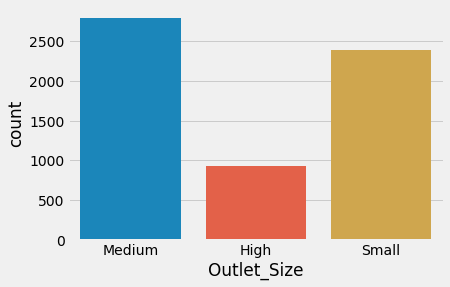

In [12]:
sns.countplot(train.Outlet_Size)

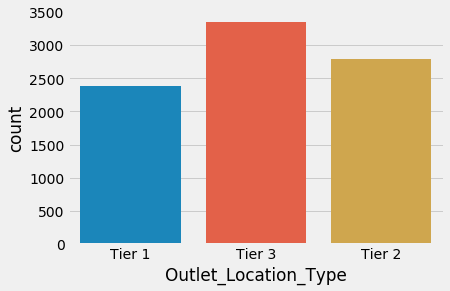

In [13]:
sns.countplot(train.Outlet_Location_Type)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

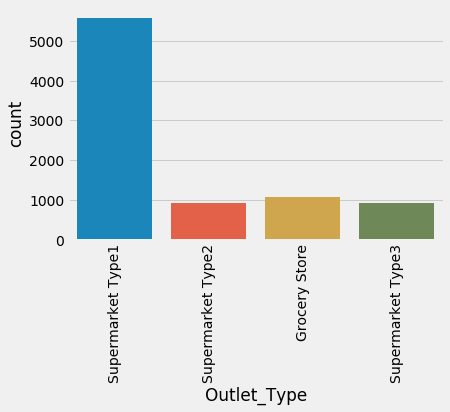

In [14]:
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=90)

## 1.2. Bivariate Analysis

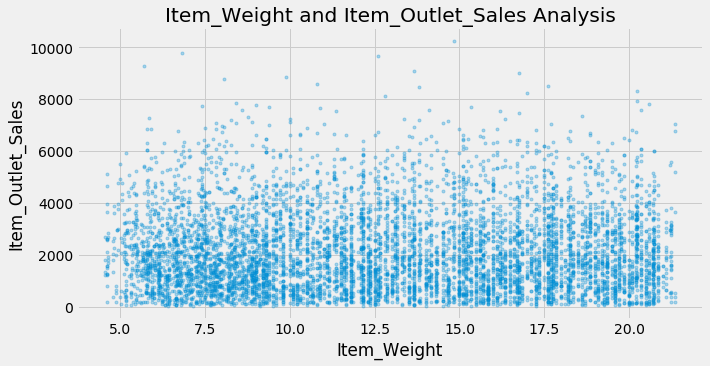

In [15]:
plt.figure(figsize=(10,5))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Weight, train["Item_Outlet_Sales"],'.', alpha = 0.3)

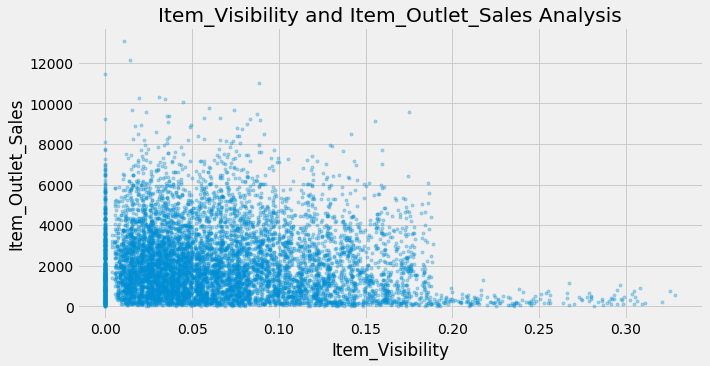

In [16]:
plt.figure(figsize=(10,5))
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Visibility and Item_Outlet_Sales Analysis')
plt.plot(train.Item_Visibility, train['Item_Outlet_Sales'],'.', alpha = 0.3)

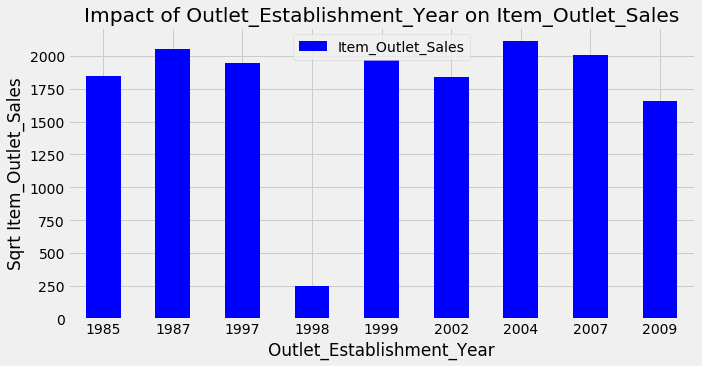

In [17]:
Outlet_Establishment_Year_pivot = \
train.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(10,5))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

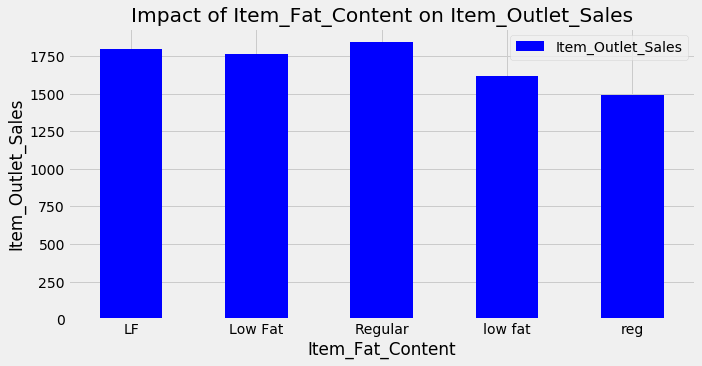

In [18]:
Item_Fat_Content_pivot = \
train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(10,5))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

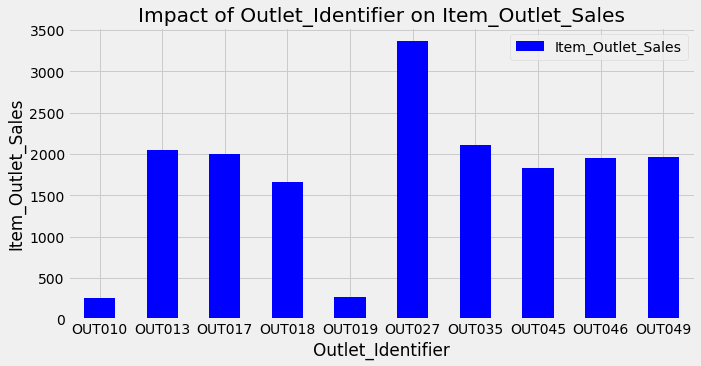

In [19]:
Outlet_Identifier_pivot = \
train.pivot_table(index='Outlet_Identifier', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar', color='blue',figsize=(10,5))
plt.xlabel('Outlet_Identifier')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Outlet_Identifier on Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()

In [20]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Identifier',aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [21]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Size',aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


## Data Preprocessing

#### 2. 1. Looking for missing values

In [22]:
# Join Train and Test Dataset
#Create source column to later separate the data easily
train['source']='train'
test['source']='test'
data = pd.concat([train,test], ignore_index = True)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [23]:
#Check the percentage of null values per variable
data.isnull().sum()/data.shape[0]*100 #show values in percentage

Item_Identifier               0.000000
Item_Weight                  17.171219
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
source                        0.000000
dtype: float64

In [24]:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
print(item_avg_weight)

                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
...                      ...
NCZ30                  6.590
NCZ41                 19.850
NCZ42                 10.500
NCZ53                  9.600
NCZ54                 14.650

[1559 rows x 1 columns]


In [25]:
visibility_item_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')
print(visibility_item_avg)

                 Item_Visibility
Item_Identifier                 
DRA12                   0.034938
DRA24                   0.045646
DRA59                   0.133384
DRB01                   0.079736
DRB13                   0.006799
...                          ...
NCZ30                   0.027302
NCZ41                   0.056396
NCZ42                   0.011015
NCZ53                   0.026330
NCZ54                   0.081345

[1559 rows x 1 columns]


In [26]:
data['Item_Weight'].isnull().sum().sum()

2439

In [27]:
#Note: The previous ideia becomes more clear if you run this.
data[:][data['Item_Identifier'] == 'DRI11']
def impute_weight(cols):
    Weight = cols[0]
    Identifier = cols[1]
    
    if pd.isnull(Weight):
        return item_avg_weight['Item_Weight'][item_avg_weight.index == Identifier]
    else:
        return Weight
print ('Orignal #missing: %d'%sum(data['Item_Weight'].isnull()))
data['Item_Weight'] = data[['Item_Weight','Item_Identifier']].apply(impute_weight,axis=1).astype(float)
print ('Final #missing: %d'%sum(data['Item_Weight'].isnull()))

Orignal #missing: 2439
Final #missing: 0


In [28]:
#Import mode function:
from scipy.stats import mode
#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [29]:
def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size
print ('Orignal #missing: %d'%sum(data['Outlet_Size'].isnull()))
data['Outlet_Size'] = data[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)
print ('Final #missing: %d'%sum(data['Outlet_Size'].isnull()))

Orignal #missing: 4016
Final #missing: 0


In [30]:
data.isnull().sum().sum()

5681

In [31]:
#Creates pivot table with Outlet_Type and the mean of #Item_Outlet_Sales. Agg function is by default mean()
data.pivot_table(values='Item_Outlet_Sales', columns='Outlet_Type')

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Outlet_Sales,339.8285,2316.181148,1995.498739,3694.038558


In [32]:
#Remember the data is from 2013
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [33]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',                                                      'NC':'Non-Consumable',                                                            'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [34]:
#Change categories of low fat:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())
print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',                                                      'reg':'Regular',
'low fat':'Low Fat'})
print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [35]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [36]:
func = lambda x: x['Item_Visibility']/visibility_item_avg['Item_Visibility'][visibility_item_avg.index == x['Item_Identifier']][0]
data['Item_Visibility_MeanRatio'] = data.apply(func,axis=1).astype(float)
data['Item_Visibility_MeanRatio'].describe()

count    14204.000000
mean         1.000000
std          0.348382
min          0.000000
25%          0.921522
50%          0.962037
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64

In [37]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [38]:
#Dummy Variables:
data = pd.get_dummies(data, columns =['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
Item_Visibility_MeanRatio    float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
O

In [39]:
#Drop the columns which have been converted to different types:

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]
#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)
#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [40]:
train_df = pd.read_csv('train_modified.csv')
test_df = pd.read_csv('test_modified.csv')

In [41]:
train_df.shape

(8523, 36)

In [42]:
test_df.shape

(5681, 35)

In [43]:
train_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales', 'Outlet_Years', 'Item_Visibility_MeanRatio',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Fat_Content_2',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Size_1',
       'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2',
       'Outlet_Type_3', 'Item_Type_Combined_0', 'Item_Type_Combined_1',
       'Item_Type_Combined_2', 'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3',
       'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9'],
      dtype='object')

In [44]:
train_df_model = train_df.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Type','Outlet_Establishment_Year'], axis = 1)
test_df_model = test_df.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Type','Outlet_Establishment_Year'], axis = 1)

In [45]:
y =train_df_model['Item_Outlet_Sales']
x = train_df_model.drop(['Item_Outlet_Sales'], axis = 1)
x_test = test_df_model

In [46]:
print("Shape of the x :", x.shape)
print("Shape of the y :", y.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x : (8523, 31)
Shape of the y : (8523,)
Shape of the x Test : (5681, 31)


In [47]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [48]:
# lets print the shapes again 
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Valid :", x_valid.shape)
print("Shape of the y Valid :", y_valid.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x Train : (6818, 31)
Shape of the y Train : (6818,)
Shape of the x Valid : (1705, 31)
Shape of the y Valid : (1705,)
Shape of the x Test : (5681, 31)


## 5.1. Linear Regression Model

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from math import sqrt

model = LinearRegression()


In [50]:
model.fit(x_train, y_train)

LinearRegression()

In [51]:
x_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Visibility_MeanRatio,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
6404,9.210,0.008722,123.5414,28,0.925131,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5820,18.700,0.014623,52.0324,11,1.038798,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48,15.850,0.121633,60.6220,16,0.874729,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
4583,5.155,0.145670,247.2776,28,1.614811,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3791,21.000,0.049296,194.4478,9,0.874563,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [52]:

y_pred_lr = model.predict(x_valid)
y_pred_lr

array([ 2446.21125205,  2529.85036686,  2197.39448298, ...,
        4165.61291119, -1035.09377368,  5389.23900428])

In [53]:
rms = sqrt(mean_squared_error(y_valid, y_pred_lr))
rms

1129.7639164037737

### 5.4. Random Forrest Model

In [54]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)

rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4)

In [55]:
y_pred_rf = rfr.predict(x_valid)
y_pred_rf

array([2553.7632379 , 1299.00876386, 2091.64652065, ..., 3871.41437466,
        148.07217879, 5732.05777586])

In [56]:
rms = sqrt(mean_squared_error(y_valid, y_pred_rf))
rms

1098.6910615629026

In [57]:
random_forest = rfr.score(x_valid,y_valid)
random_forest

0.5875708867450669

## XGBoost

In [58]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
y_pred_xg = xgb.predict(x_valid)
y_pred_xg

array([2771.7114 , 2248.1797 , 2377.5828 , ..., 5548.1133 ,  236.85663,
       4921.329  ], dtype=float32)

In [60]:
rms = sqrt(mean_squared_error(y_valid, y_pred_xg))
rms

1200.7694442495117

## Decision Tree

In [61]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
DT.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

In [62]:
y_pred_dt = DT.predict(x_valid)
y_pred_dt

array([2521.99455871, 1365.38522314, 1962.95036159, ..., 4496.1474    ,
        131.6409046 , 5965.31675472])

In [63]:
rms = sqrt(mean_squared_error(y_valid, y_pred_dt))
rms

1102.06097942113

In [64]:
rfecv_pred_dt = DT.predict(x_test)
rfecv_pred_dt

array([1553.55530693, 1245.50693846,  601.73101714, ..., 1756.49040174,
       3711.82131918, 1367.70833786])

In [65]:
rfecv_pred_rf = rfr.predict(x_test)
rfecv_pred_rf

array([1605.71071373, 1414.28755333,  555.28223898, ..., 1892.20575772,
       3800.08206223, 1336.63888995])

In [66]:
test_df_model.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Visibility_MeanRatio,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,20.750,0.007565,107.8622,14,1.029192,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,8.300,0.038428,87.3198,6,1.130311,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2,14.600,0.099575,241.7538,15,1.735215,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,7.315,0.015388,155.0340,6,1.291577,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,13.600,0.118599,234.2300,28,0.917824,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [67]:
test_submission = test.copy()

In [76]:
test_submission.columns

Index(['Item_Identifier', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [78]:
test_submission.drop(['Item_Type','Outlet_Establishment_Year' ],axis=1,inplace=True)

In [79]:
test_submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
8523,FDW58,OUT049,1605.710714
8524,FDW14,OUT017,1414.287553
8525,NCN55,OUT010,555.282239
8526,FDQ58,OUT017,2420.989704
8527,FDY38,OUT027,5732.057776


In [83]:
test_submission['Item_Outlet_Sales'] = rfecv_pred_rf

In [84]:
test_submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
8523,FDW58,OUT049,1605.710714
8524,FDW14,OUT017,1414.287553
8525,NCN55,OUT010,555.282239
8526,FDQ58,OUT017,2420.989704
8527,FDY38,OUT027,5732.057776


In [85]:
test_submission.to_csv("SalesPrediction_submission.csv", index=False)